In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML,clear_output

In [2]:
prHdf = pd.read_csv('../input/buyingHabitsOfDigiKalaUsers/purchase_history.csv')
ansdf = pd.read_csv('../input/buyingHabitsOfDigiKalaUsers/answer.csv')
print(prHdf.shape)
print(ansdf.shape)

(2174447, 3)
(318050, 2)


In [3]:
prHdf.head()

,user_id,product_id,created_at
0,647746,2011564,2019-02-09
1,906136,4105782,2019-11-23
2,12862997,2144063,2019-07-16
3,12097079,1207738,2019-04-05
4,3184486,4278839,2019-03-08


In [4]:
prHdf["created_at"] = pd.to_datetime(prHdf["created_at"])

In [5]:
prHdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174447 entries, 0 to 2174446
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int64         
 1   product_id  int64         
 2   created_at  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 49.8 MB


In [6]:
prHdf.head()

,user_id,product_id,created_at
0,647746,2011564,2019-02-09
1,906136,4105782,2019-11-23
2,12862997,2144063,2019-07-16
3,12097079,1207738,2019-04-05
4,3184486,4278839,2019-03-08


### How many user?

In [7]:
prHdf[['user_id','product_id']].nunique()

user_id       96688
product_id    41127
dtype: int64

In [8]:
prHdf.isna().sum()

user_id       0
product_id    0
created_at    0
dtype: int64

In [9]:
ansdf.head()

,user_id,product_id
0,577243,724112
1,577243,875550
2,577243,895941
3,577243,895955
4,577243,896036


In [10]:
ansdf.nunique()

user_id       96688
product_id    41127
dtype: int64

In [11]:
ansdf.isna().sum()

user_id       0
product_id    0
dtype: int64

In [12]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318050 entries, 0 to 318049
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     318050 non-null  int64
 1   product_id  318050 non-null  int64
dtypes: int64(2)
memory usage: 4.9 MB


In [13]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 5):
    print(prHdf['user_id'].value_counts())

29623462    13604
38514908     4514
7024706      3434
3424777      3410
7359226      2431
            ...  
1030577         4
1165576         4
9539526         4
7052017         4
3233681         4
Name: user_id, Length: 96688, dtype: int64


In [14]:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 5):
    display(HTML(prHdf.head(10).to_html()))


,user_id,product_id,created_at
0,647746,2011564,2019-02-09
1,906136,4105782,2019-11-23
2,12862997,2144063,2019-07-16
3,12097079,1207738,2019-04-05
4,3184486,4278839,2019-03-08
5,1377479,2859499,2019-09-08
6,943754,3804465,2019-06-30
7,29623462,3900219,2019-02-09
8,1208975,1122713,2019-07-14
9,11713107,4356008,2019-09-27


In [15]:
sortedPr = prHdf.sort_values(by=['user_id','product_id','created_at'])
sortedPr.head(10)

,user_id,product_id,created_at
68489,577243,724112,2019-03-13
1304270,577243,724112,2019-03-25
418727,577243,724112,2019-04-22
1859117,577243,724112,2019-06-16
988009,577243,724112,2019-06-29
1277322,577243,875550,2019-01-19
407470,577243,875550,2019-02-13
711978,577243,875550,2019-04-13
1521046,577243,875550,2019-06-16
1434989,577243,895941,2019-01-19


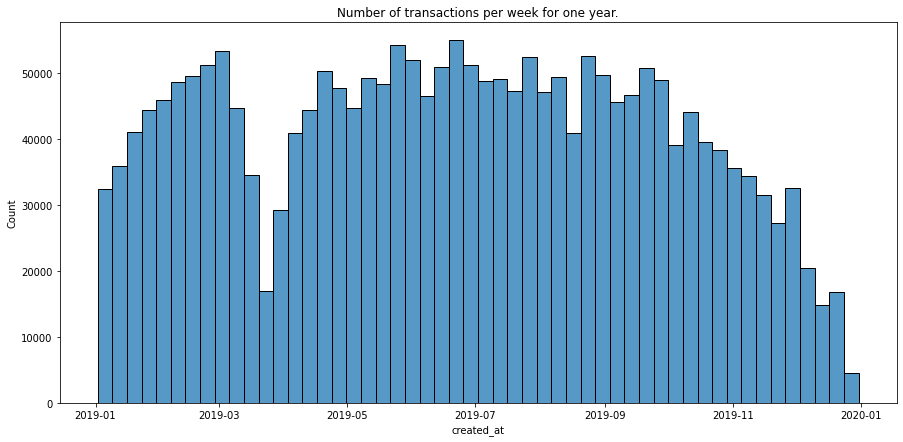

In [16]:
plt.figure(figsize=(15,7))
ax=sns.histplot(data=sortedPr,x='created_at',bins=52)
ax.set_title('Number of transactions per week for one year.');

In [17]:
cond = (sortedPr['user_id']==577243 ) & ( sortedPr['product_id']==724112 )
exmpUserProd = sortedPr[cond].copy()
exmpUserProd['user_id'] = exmpUserProd['user_id'].astype(str)
exmpUserProd['product_id'] = exmpUserProd['product_id'].astype(str)

In [18]:
exmpUserProd['diff'] = exmpUserProd['created_at'] - exmpUserProd['created_at'].shift(1)
exmpUserProd

,user_id,product_id,created_at,diff
68489,577243,724112,2019-03-13,NaT
1304270,577243,724112,2019-03-25,12 days
418727,577243,724112,2019-04-22,28 days
1859117,577243,724112,2019-06-16,55 days
988009,577243,724112,2019-06-29,13 days


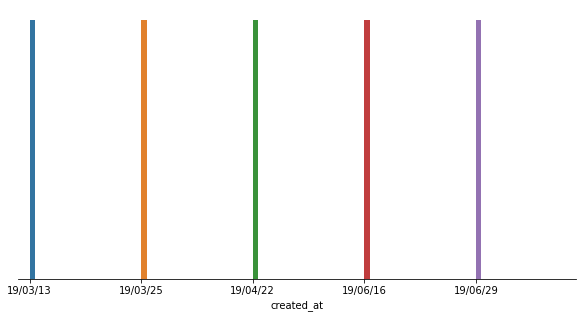

In [19]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data= exmpUserProd, x=exmpUserProd['created_at'], y =[1 for i in range(len(exmpUserProd))]  )
for i,patch in enumerate(ax.patches):
    current_width = patch.get_width()
    # we change the bar width
    patch.set_width(0.05)
ax.set_yticks([])
sns.despine(left=True)
plt.xticks(np.arange(len(exmpUserProd['created_at']))-0.4,exmpUserProd['created_at'].dt.strftime('%y/%m/%d'));

In [20]:
df = sortedPr[sortedPr['user_id']==577243].copy()
df['diffDay'] = df.groupby(['user_id','product_id'],as_index=False)['created_at'].transform(lambda x : x-x.shift(1))
df.head(15)

,user_id,product_id,created_at,diffDay
68489,577243,724112,2019-03-13,NaT
1304270,577243,724112,2019-03-25,12 days
418727,577243,724112,2019-04-22,28 days
1859117,577243,724112,2019-06-16,55 days
988009,577243,724112,2019-06-29,13 days
1277322,577243,875550,2019-01-19,NaT
407470,577243,875550,2019-02-13,25 days
711978,577243,875550,2019-04-13,59 days
1521046,577243,875550,2019-06-16,64 days
1434989,577243,895941,2019-01-19,NaT


In [21]:
import sys
sys.getsizeof(prHdf)/1e6

52.186888

In [22]:
prHdf.memory_usage()/1e6

Index          0.000128
user_id       17.395576
product_id    17.395576
created_at    17.395576
dtype: float64

In [23]:
#free memory
del exmpUserProd,df,prHdf

In [24]:
df = sortedPr.copy()
df['diffDay'] = df.groupby(['user_id','product_id'],as_index=False)['created_at'].transform(lambda x : x-x.shift(1))
df['diffDay'] = df['diffDay'].dt.days
firstRecord = pd.Timestamp('2019-01-01')
df['GoneDays'] = (df['created_at'] - firstRecord).dt.days
df.reset_index(inplace=True)
df.tail(15)

,index,user_id,product_id,created_at,diffDay,GoneDays
2174432,580497,45471482,1945563,2019-02-17,NaN,47
2174433,483565,45471482,1945563,2019-02-27,10.0,57
2174434,1309264,45471482,1945563,2019-03-17,18.0,75
2174435,964042,45471482,1945563,2019-08-10,146.0,221
2174436,320355,45471482,3309954,2019-10-31,NaN,303
2174437,1867727,45471482,3309954,2019-11-08,8.0,311
2174438,72878,45471482,3309954,2019-11-11,3.0,314
2174439,1150243,45471482,3309954,2019-11-15,4.0,318
2174440,2155197,45471482,4563945,2019-10-01,NaN,273
2174441,1373089,45471482,4563945,2019-10-04,3.0,276


In [25]:
df.to_csv('added_diffDay_GoneDay_beforeSeperating.csv')

#### Seperating last date of purchases for every user-product as a target date.

In [26]:
target = df.reset_index().groupby(['user_id','product_id'],as_index=False).agg(created_at=('created_at','max'),
                                                                 diffDay=('diffDay',lambda x:x.iloc[-1]),
                                                                 GoneDays=('GoneDays',lambda x:x.iloc[-1]),
                                                                  index = ('index',lambda x:x.iloc[-1]) )

In [27]:
#changing position of index column.
target.insert(0, 'index', target.pop('index'))

In [28]:
target.tail(6)

,index,user_id,product_id,created_at,diffDay,GoneDays
318044,687066,45339741,975982,2019-11-08,70.0,311
318045,806653,45431507,4375282,2019-08-27,47.0,238
318046,1352989,45443053,1660612,2019-12-24,0.0,357
318047,964042,45471482,1945563,2019-08-10,146.0,221
318048,1150243,45471482,3309954,2019-11-15,4.0,318
318049,759240,45471482,4563945,2019-11-15,4.0,318


In [29]:
target.to_csv('targetLastDatePurchase_user-product.csv')

In [30]:
trainData = df[~df['index'].isin(target['index'])]

In [31]:
trainData.tail(2)

,index,user_id,product_id,created_at,diffDay,GoneDays
2174444,1121576,45471482,4563945,2019-11-10,12.0,313
2174445,1535111,45471482,4563945,2019-11-11,1.0,314


#### Checking

In [32]:
smplIDX =target.sample(1)
smplIDX

,index,user_id,product_id,created_at,diffDay,GoneDays
68010,1799285,3135587,3831420,2019-11-18,88.0,321


In [33]:
df[df['index']==smplIDX['index'].iloc[0]]

,index,user_id,product_id,created_at,diffDay,GoneDays
446216,1799285,3135587,3831420,2019-11-18,88.0,321


In [34]:
trainData[trainData['index']==smplIDX['index'].iloc[0]]

,index,user_id,product_id,created_at,diffDay,GoneDays


In [35]:
#trainData.to_csv('Train_Purchase_user-product_beforeFeatureExtraction.csv')

In [36]:
groupedtrdf = trainData.groupby(['user_id','product_id'],as_index=False).agg(allDiffDay =('diffDay',lambda x: x.tolist()),
                                                                     LenOfList =('diffDay','size'),
                                                                    allGoneDay=('GoneDays',lambda x: x.tolist()))
print(groupedtrdf.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(groupedtrdf.tail(6).to_html()))


(318050, 5)


,user_id,product_id,allDiffDay,LenOfList,allGoneDay
318044,45339741,975982,"[nan, 12.0, 19.0, 19.0, 8.0, 44.0, 36.0, 18.0, 27.0]",9,"[58, 70, 89, 108, 116, 160, 196, 214, 241]"
318045,45431507,4375282,"[nan, 73.0, 21.0]",3,"[97, 170, 191]"
318046,45443053,1660612,"[nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 1.0, 1.0, 0.0, 13.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, 3.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 1.0, 17.0, 0.0, 0.0]",44,"[253, 253, 254, 255, 256, 256, 257, 258, 258, 265, 265, 265, 265, 266, 278, 284, 295, 296, 297, 297, 310, 310, 313, 313, 315, 315, 316, 319, 319, 322, 326, 328, 329, 330, 330, 330, 331, 333, 337, 339, 340, 357, 357, 357]"
318047,45471482,1945563,"[nan, 10.0, 18.0]",3,"[47, 57, 75]"
318048,45471482,3309954,"[nan, 8.0, 3.0]",3,"[303, 311, 314]"
318049,45471482,4563945,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0]",6,"[273, 276, 289, 301, 313, 314]"


### Caculate probabilty of a product based on user or user transactions.

In [37]:
groupedtrdf['ProductProbPerUser'] = groupedtrdf.groupby('user_id',as_index=False)['LenOfList'].transform(lambda x:x/np.nansum(x))

print(groupedtrdf.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(groupedtrdf.tail(6).to_html()))

(318050, 6)


,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser
318044,45339741,975982,"[nan, 12.0, 19.0, 19.0, 8.0, 44.0, 36.0, 18.0, 27.0]",9,"[58, 70, 89, 108, 116, 160, 196, 214, 241]",0.692308
318045,45431507,4375282,"[nan, 73.0, 21.0]",3,"[97, 170, 191]",1.000000
318046,45443053,1660612,"[nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 1.0, 1.0, 0.0, 13.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, 3.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 1.0, 17.0, 0.0, 0.0]",44,"[253, 253, 254, 255, 256, 256, 257, 258, 258, 265, 265, 265, 265, 266, 278, 284, 295, 296, 297, 297, 310, 310, 313, 313, 315, 315, 316, 319, 319, 322, 326, 328, 329, 330, 330, 330, 331, 333, 337, 339, 340, 357, 357, 357]",1.000000
318047,45471482,1945563,"[nan, 10.0, 18.0]",3,"[47, 57, 75]",0.250000
318048,45471482,3309954,"[nan, 8.0, 3.0]",3,"[303, 311, 314]",0.250000
318049,45471482,4563945,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0]",6,"[273, 276, 289, 301, 313, 314]",0.500000


In [38]:
# testing probabilty calculation
smpl_user_id =groupedtrdf.sample(1)['user_id'].iloc[0]
t=groupedtrdf[groupedtrdf['user_id']==smpl_user_id]
t

,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser
121413,5805289,3880419,"[nan, 6.0, 17.0]",3,"[98, 104, 121]",1.0


#### Probabilty of each product for buying

In [39]:
productProb = pd.DataFrame(trainData['product_id'].value_counts()).reset_index()
productProb.columns=['product_id','ProductProb']
productProb['ProductProb'] = (productProb['ProductProb']/len(productProb['ProductProb']) ).round(4)
print(productProb.shape)
productProb.head(5)

(41127, 2)


,product_id,ProductProb
0,895742,0.5722
1,4233247,0.4766
2,2198311,0.4740
3,1660612,0.4454
4,968153,0.3675


In [40]:
productUsertrdf=pd.merge(left=groupedtrdf,right=productProb,how='left',on='product_id')
print(productUsertrdf.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(productUsertrdf.tail(5).to_html()))

(318050, 7)


,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser,ProductProb
318045,45431507,4375282,"[nan, 73.0, 21.0]",3,"[97, 170, 191]",1.00,0.1068
318046,45443053,1660612,"[nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 1.0, 1.0, 0.0, 13.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, 3.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 1.0, 17.0, 0.0, 0.0]",44,"[253, 253, 254, 255, 256, 256, 257, 258, 258, 265, 265, 265, 265, 266, 278, 284, 295, 296, 297, 297, 310, 310, 313, 313, 315, 315, 316, 319, 319, 322, 326, 328, 329, 330, 330, 330, 331, 333, 337, 339, 340, 357, 357, 357]",1.00,0.4454
318047,45471482,1945563,"[nan, 10.0, 18.0]",3,"[47, 57, 75]",0.25,0.0003
318048,45471482,3309954,"[nan, 8.0, 3.0]",3,"[303, 311, 314]",0.25,0.0001
318049,45471482,4563945,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0]",6,"[273, 276, 289, 301, 313, 314]",0.50,0.0001


In [41]:
productUsertrdf.isna().sum()

user_id               0
product_id            0
allDiffDay            0
LenOfList             0
allGoneDay            0
ProductProbPerUser    0
ProductProb           0
dtype: int64

### extract some features for each product and for each user.

In [42]:
def extractToApply(x):
    x['avgDiffDay'] = np.nanmean(x['allDiffDay'])
    x['stdDiffDay'] = np.nanstd(x['allDiffDay'])
    x['maxDiffDay'] = np.nanmax(x['allDiffDay'])
    x['minDiffDay'] = np.nanmin(x['allDiffDay'])
    
    x['maxGoneDay'] = np.nanmax(x['allGoneDay'])
    x['minGoneDay'] = np.nanmin(x['allGoneDay'])
    x['medianGoneDay'] = np.nanmedian(x['allGoneDay'])
    x['stdGoneDay'] = np.nanstd(x['allGoneDay'])
    #x['LastGoneDay']=x['allGoneDay'][-1]
    
    return x

In [43]:
productUsertrdf = productUsertrdf.apply(extractToApply,axis=1)
print(productUsertrdf.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(productUsertrdf.tail(5).to_html()))

(318050, 15)


,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay
318045,45431507,4375282,"[nan, 73.0, 21.0]",3,"[97, 170, 191]",1.00,0.1068,47.000000,26.000000,73.0,21.0,191,97,170.0,40.285095
318046,45443053,1660612,"[nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 1.0, 1.0, 0.0, 13.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, 3.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 1.0, 17.0, 0.0, 0.0]",44,"[253, 253, 254, 255, 256, 256, 257, 258, 258, 265, 265, 265, 265, 266, 278, 284, 295, 296, 297, 297, 310, 310, 313, 313, 315, 315, 316, 319, 319, 322, 326, 328, 329, 330, 330, 330, 331, 333, 337, 339, 340, 357, 357, 357]",1.00,0.4454,2.418605,3.871377,17.0,0.0,357,253,311.5,33.147889
318047,45471482,1945563,"[nan, 10.0, 18.0]",3,"[47, 57, 75]",0.25,0.0003,14.000000,4.000000,18.0,10.0,75,47,57.0,11.585431
318048,45471482,3309954,"[nan, 8.0, 3.0]",3,"[303, 311, 314]",0.25,0.0001,5.500000,2.500000,8.0,3.0,314,303,311.0,4.642796
318049,45471482,4563945,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0]",6,"[273, 276, 289, 301, 313, 314]",0.50,0.0001,8.200000,5.114685,13.0,1.0,314,273,295.0,16.326529


In [44]:
productUsertrdf.to_csv('productUsertrdf.csv')

In [45]:
mem = productUsertrdf.memory_usage()/1e6
print('sum: ',np.sum(mem))
mem

sum:  40.7104


Index                 2.5444
user_id               2.5444
product_id            2.5444
allDiffDay            2.5444
LenOfList             2.5444
allGoneDay            2.5444
ProductProbPerUser    2.5444
ProductProb           2.5444
avgDiffDay            2.5444
stdDiffDay            2.5444
maxDiffDay            2.5444
minDiffDay            2.5444
maxGoneDay            2.5444
minGoneDay            2.5444
medianGoneDay         2.5444
stdGoneDay            2.5444
dtype: float64

### Users with highest transactions(80 percentile)

In [46]:
productUsertrdfCopy = productUsertrdf.copy()
#productUsertrdfCopy.reset_index(inplace=True)
totalTrdf = productUsertrdfCopy.groupby('user_id',as_index=False).agg(totalTrasPerUser=('LenOfList','sum'))
del productUsertrdfCopy
highestTrdf = totalTrdf[totalTrdf['totalTrasPerUser']>= totalTrdf['totalTrasPerUser'].quantile(0.80)]
del totalTrdf
highestTrdf

,user_id,totalTrasPerUser
0,577243,140
5,577521,21
13,577790,22
15,577856,40
19,577980,125
...,...,...
96678,45334501,96
96679,45334805,41
96681,45335223,62
96683,45338907,20


In [47]:
highestTrdf['totalTrasPerUser'].min()

19

In [48]:
highestTrdf['totalTrasPerUser'].max()

13602